In [ ]:
import numpy as np

def norma(u):
    return np.sqrt(sum(u**2))

def wrelax(A, b, x0, w, abstol=1.e-10, reltol=1.e-10, maxIter=100):
    m, n = A.shape
    #Comprovar dimensions i coses
    
    x = x0.copy()
    i = 0
    acabat = False
    while not acabat:

        i = i + 1
        x0 = x.copy()
        #Anar fent

        for j in range(n): 
            x[j] = (1-w) * x[j] + (w/A[j,j]) * (b[j] - sum(A[j, :]*x[:]) + A[j,j]*x[j])
        
        #Comprovar coses
        
        if((norma(x0 - x) < abstol or norma(x0-x) / norma(x) < reltol) and i > 1):
            acabat = True
        
        if(i > maxIter):
            if(norma(x0 - x) > abstol and norma(x0-x) / norma(x) < reltol):
                return x, -1
            if(norma(x0 - x) > abstol and norma(x0-x) / norma(x) > reltol):
                return x, -2
            return x, -3
    return x, i

# Exercici 1
Cal crear una funció que resolgui una EDO, donada una funció F.

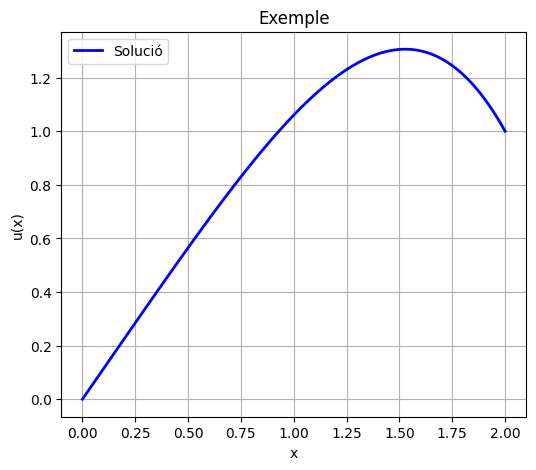

1.0685505050503792
1.084719515151389
-0.8084505050504953
1.0


In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
def solEstEq1D(a, b, ca, cb, N, F, maxIter=1.e5, tol=1.e-10):
    #On a i b són els extrems del interval, i ca i cb són els punts extrems
    #Definim el vector u i l'inicialitzem:
    u0 = (ca + cb) / 2
    u = np.full((N), u0, dtype=np.float64)
    u[0] = ca
    u[-1] = cb
    Fi = np.empty((N), dtype=np.float64)
    delta = (b - a)/N
    for i in range(N):
        Fi[i] = F(a + delta*i)

    for i in range(int(maxIter)):
        u[1:N-1] = (u[:N-2]+u[2:] + delta**2 * Fi[1:N-1])/2
    return(u, 0)




def dibuixaSol1D(u,a,b,titol='Exemple'):
    # Nombre de punts:
    Nplus1 = u.shape[0]

    # Malla equiespaiada:
    x = np.linspace(a,b,Nplus1)

    # Obrim la Figura i dibuixem:
    plt.figure(figsize=(6, 5))

    # Plot:
    plt.plot(x, u, label="Solució", color="b", linewidth=2)

    # Eixos i llegenda
    plt.xlabel("x")
    plt.ylabel("u(x)")
    plt.title(titol)
    plt.grid(True)
    plt.legend()

    # Mostrem el dibuix:
    plt.show()
def funcio(x):
    return x**2


N = 100
a,b = 0, 2
ca,cb = 0,1

u,niter = solEstEq1D(a, b, ca, cb, N, funcio, maxIter = 1.e5)
dibuixaSol1D(u,a,b)
print(u[50])
print(u[51])
print((u[50]-u[51])*N / (b - a))
print(funcio(a + 50*(b-a)/N))